# Exercise Practice 1 - Structured Dataset



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

In [1]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler, MinMaxScaler


### Exploring The Data

In [3]:
# # Read dataset - Products
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Ind/fashion_products.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# select with no duplicated data
df = df[~df.duplicated()]

In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 78.1+ KB


In [6]:
# Number of Unqie Value in Every Columns
df.nunique()

User ID          100
Product ID      1000
Product Name       5
Brand              5
Category           3
Price             91
Rating          1000
Color              6
Size               4
dtype: int64

### Describe The Data

In [7]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [8]:
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


## Data collection

In [9]:
datasets_1 = np.genfromtxt('/content/drive/MyDrive/Machine Learning Ind/fashion_products.csv', delimiter=',')
datasets_2 = np.genfromtxt('/content/drive/MyDrive/Machine Learning Ind/fptest.csv', delimiter=',', autostrip = True )
for i, n in enumerate(datasets_2[:,8]):
    if isinstance(n, str):
        datasets_2[i, 8] = n.strip()
    elif isinstance(n, float):
        # Jika n adalah float, maka konversi ke string, lalu hapus whitespace
        datasets_2[i, 8] = str(n).strip()
feature_and_labels_names=["User ID", "Product ID", "Product Name", "Brand", "Category", "Price","Rating",
                 "Color", "Size"]

alldata = np.concatenate((datasets_1, datasets_2), axis=0)

df = pd.DataFrame(alldata, columns=feature_and_labels_names)

In [10]:
from numpy import unique
for i in range(alldata.shape[1]):
    if len(unique(alldata[:, i])) <=1:
           print(i)
    else:
           print(i, len(unique(alldata[:, i])))


0 101
1 1001
2
3
4
5 92
6 1005
7
8


In [11]:
print(df.shape)
for i in range(len(datasets_2)):
    n = datasets_2[i, 8]
    if isinstance(n, (str, float)):
        # Konversi ke string dan hapus whitespace
        datasets_2[i, 8] = str(n).strip()

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)

(1021, 9)
(1021, 9)
(1021, 9)


1       1
2       4
3       3
4       1
5       4
       ..
1016    4
1017    1
1018    1
1019    4
1020    3
Name: Rating, Length: 1019, dtype: int64


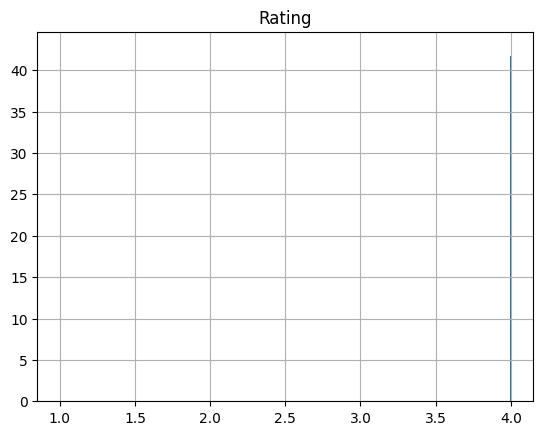

In [13]:
df = df.dropna(subset=['Rating'])
df['Rating'] = df['Rating'].astype(int)
print(df['Rating'])
ax=df.hist(column=['Rating'],density=True,bins=500)

Removing outliers

In [16]:
if 'User ID' in df.columns:
    df = df.drop('User ID', axis=1)
else:
    print("Kolom 'User ID' tidak ditemukan dalam DataFrame.")
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:,-1]
data =np.delete(data,[5],axis = 0)

 Feature selection is done in this step that Education-num is deleted for the repetition.

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import numpy as np

categorical_features = [0, 1, 3, 4, 5, 6, 7]
categorical_names = {}
for feature in categorical_features:
    if feature < data.shape[1]:  # Memeriksa apakah indeks valid
        le = LabelEncoder()
        data[:, feature] = le.fit_transform(data[:, feature])
        categorical_names[feature] = le.classes_
    else:
        print(f"Invalid feature index: {feature}")

t = [
    ('cat', OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 12]),
    ('num', MinMaxScaler(), [2, 9, 10, 11])
]

transformer = ColumnTransformer(transformers=t, remainder='passthrough')
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
data = data.astype(float)

data_1 = data[0:3000]
y_1 = y[0:3000]

In [20]:
df

,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
1,1.0,NaN,NaN,NaN,40.0,1,NaN,NaN
2,2.0,NaN,NaN,NaN,82.0,4,NaN,NaN
3,3.0,NaN,NaN,NaN,44.0,3,NaN,NaN
4,4.0,NaN,NaN,NaN,23.0,1,NaN,NaN
5,5.0,NaN,NaN,NaN,79.0,4,NaN,NaN
...,...,...,...,...,...,...,...,...
1016,15.0,NaN,NaN,NaN,54.0,4,NaN,NaN
1017,16.0,NaN,NaN,NaN,27.0,1,NaN,NaN
1018,17.0,NaN,NaN,NaN,75.0,1,NaN,NaN
1019,18.0,NaN,NaN,NaN,73.0,4,NaN,NaN


### Pie Diagram

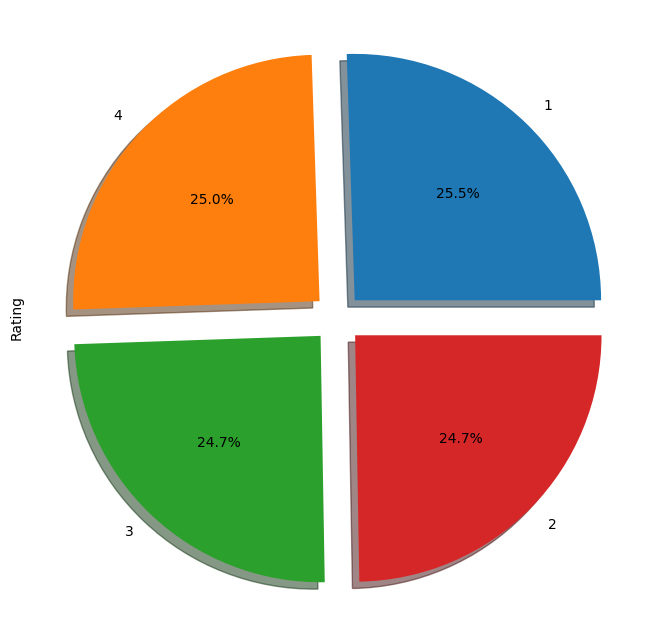

In [21]:
# Pandas plotting with matplotlib
explode = [0.1] * len(df['Rating'].unique())  # Berikan nilai explode yang sesuai
df['Rating'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(10, 8))
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 1 to 1020
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    1019 non-null   float64
 1   Product Name  0 non-null      float64
 2   Brand         0 non-null      float64
 3   Category      0 non-null      float64
 4   Price         1019 non-null   float64
 5   Rating        1019 non-null   int64  
 6   Color         0 non-null      float64
 7   Size          0 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 103.9 KB


In [26]:
df['Product Name']=df['Product Name'].astype(str).astype(str)
df['Brand']=df['Brand'].astype(str).astype(str)
df['Category']=df['Category'].astype(str).astype(str)
df['Color']=df['Color'].astype(str).astype(str)
df['Size']=df['Size'].astype(str).astype(str)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 1 to 1020
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    1019 non-null   float64
 1   Product Name  1019 non-null   object 
 2   Brand         1019 non-null   object 
 3   Category      1019 non-null   object 
 4   Price         1019 non-null   float64
 5   Rating        1019 non-null   int64  
 6   Color         1019 non-null   object 
 7   Size          1019 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 103.9+ KB


### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


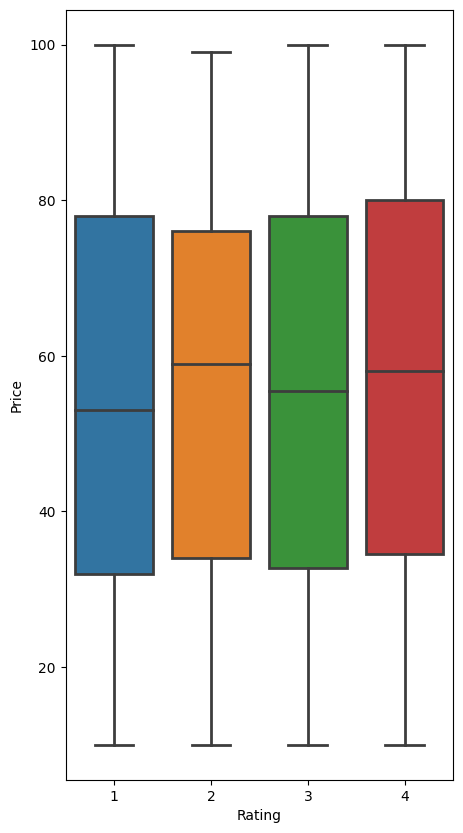

In [44]:
# Seaborn with Matplotlib
fig=plt.gcf()
fig.set_size_inches(5,10)
#fig=sns.boxplot(x='Brand', y='Rating', data=df,order=['<3','>=3'], linewidth=2)
fig=sns.boxplot(x='Rating', y='Price', data=df, linewidth=2)

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

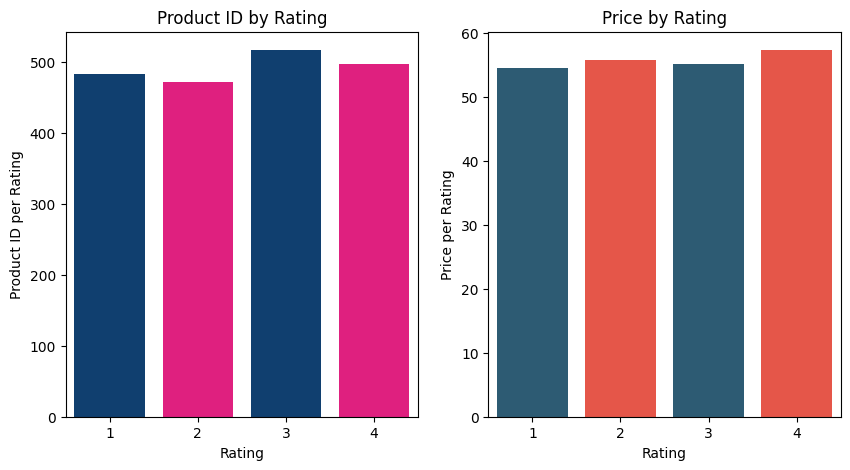

In [46]:
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
#a = sns.countplot(df['Brand'], ax=axarr[0], palette=('#003f7f','#ff007f')).set_title('Rating count by Brand')
axarr[0].set_title('Product ID by Rating')
axarr[1].set_title('Price by Rating')

a = sns.barplot(x='Rating', y='Product ID', data=df, palette=('#003f7f','#ff007f'), errorbar=None, ax=axarr[0]).set_ylabel('Product ID per Rating')
b = sns.barplot(x='Rating', y='Price', data=df, palette=('#215f7f','#ff412f'), errorbar=None, ax=axarr[1]).set_ylabel('Price per Rating')


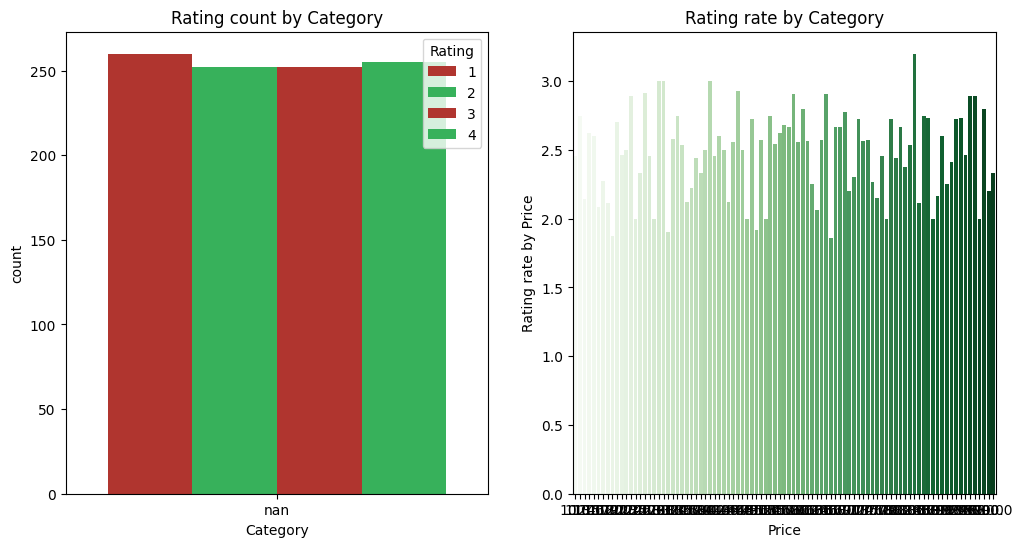

In [50]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Category', hue='Rating', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('Rating count by Category')
ax=axarr[1].set_title('Rating rate by Category')
b = sns.barplot(x='Price', y='Rating', data=df, palette="Greens", errorbar=None, ax=axarr[1]).set_ylabel('Rating rate by Price')

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan.
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…).
- dll

In [51]:
dataset = df.copy()
dataset.head()

,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
1,1.0,nan,nan,nan,40.0,1,nan,nan
2,2.0,nan,nan,nan,82.0,4,nan,nan
3,3.0,nan,nan,nan,44.0,3,nan,nan
4,4.0,nan,nan,nan,23.0,1,nan,nan
5,5.0,nan,nan,nan,79.0,4,nan,nan


In [52]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()

,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
1,1.0,0,0,0,40.0,1,0,0
2,2.0,0,0,0,82.0,4,0,0
3,3.0,0,0,0,44.0,3,0,0
4,4.0,0,0,0,23.0,1,0,0
5,5.0,0,0,0,79.0,4,0,0


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 1 to 1020
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    1019 non-null   float64
 1   Product Name  1019 non-null   int64  
 2   Brand         1019 non-null   int64  
 3   Category      1019 non-null   int64  
 4   Price         1019 non-null   float64
 5   Rating        1019 non-null   int64  
 6   Color         1019 non-null   int64  
 7   Size          1019 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 103.9 KB
